<a href="https://colab.research.google.com/github/weiyinchiang/Directed-Horizontal-Visibility-graph/blob/master/AHEAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AHEAD

Mounted at /content/drive
/content/drive/MyDrive/AHEAD


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('rituximab.csv')
df.head()

,FSC.H,SSC.H,FL1.H,FL2.H,FL3.H,FL1.A,FL1.W,Time,Gate
0,309,376,264,198,313,0,0,2,1
1,83,55,139,51,146,0,0,2,1
2,184,198,232,83,124,0,0,2,1
3,169,75,696,22,193,121,26,2,2
4,212,98,166,0,221,0,0,2,1


In [ ]:
df.loc[:,'Gate'].unique()

array([ 1,  2, -1])

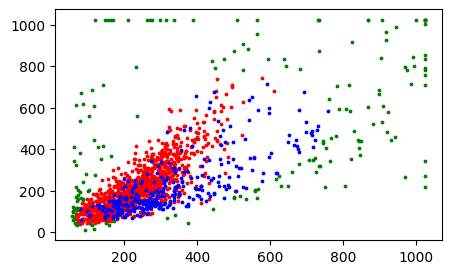

In [ ]:
plt.figure(figsize=(5,3))
label = 1
plt.scatter(df.loc[df.loc[:,'Gate']==label,'FSC.H'], df.loc[df.loc[:,'Gate']==label,'SSC.H'],s=3,color='red')
label = 2
plt.scatter(df.loc[df.loc[:,'Gate']==label,'FSC.H'], df.loc[df.loc[:,'Gate']==label,'SSC.H'],s=3,color='blue')
label = -1
plt.scatter(df.loc[df.loc[:,'Gate']==label,'FSC.H'], df.loc[df.loc[:,'Gate']==label,'SSC.H'],s=3,color='green')

In [7]:
new_df = df.drop(df.loc[df.loc[:,'Gate']==-1].index.tolist())
#drop col Time
new_df = new_df.drop(columns=['Time'])

In [8]:
new_df.columns

Index(['FSC.H', 'SSC.H', 'FL1.H', 'FL2.H', 'FL3.H', 'FL1.A', 'FL1.W', 'Gate'], dtype='object')

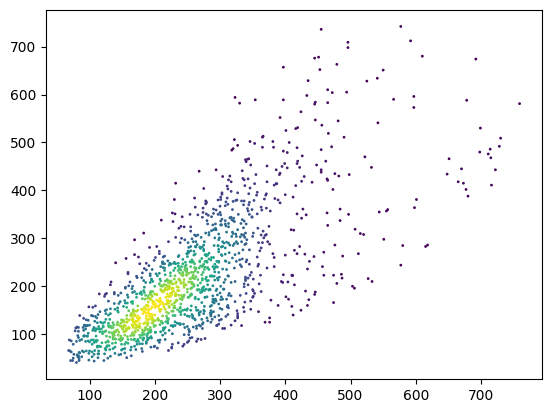

In [9]:
from scipy.stats import gaussian_kde
xy = np.vstack([new_df.loc[:,'FSC.H'], new_df.loc[:,'SSC.H']])
x = new_df.loc[:,'FSC.H'].values
y = new_df.loc[:,'SSC.H'].values
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x,y,z = x[idx], y[idx], z[idx]
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=1)

In [12]:
col_names = new_df.columns.tolist()
len(col_names)

8

In [16]:
j

9

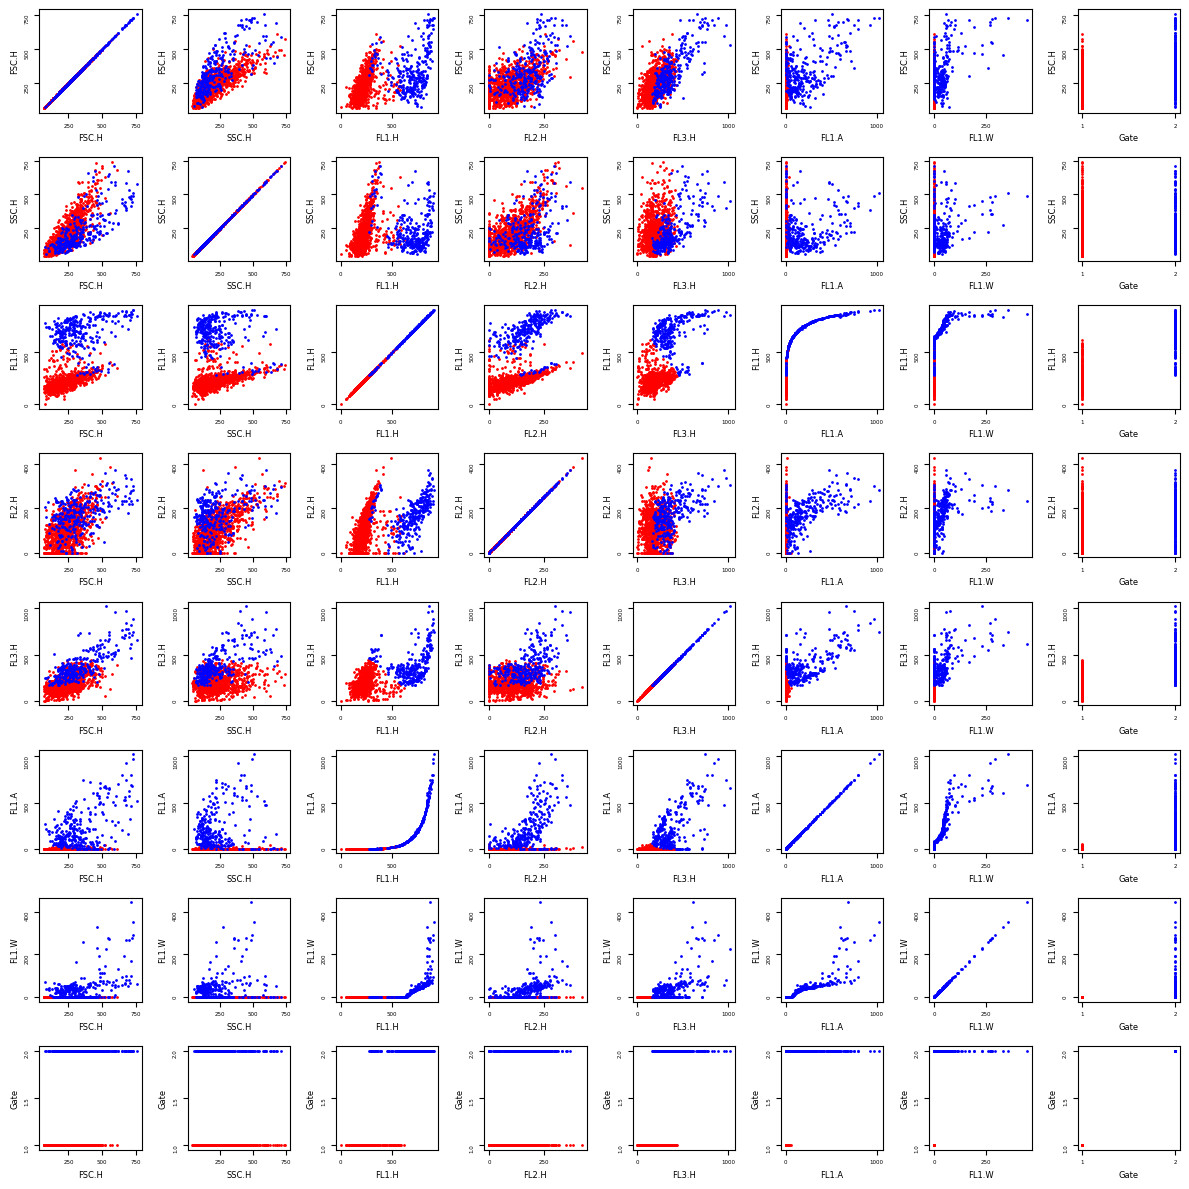

In [17]:
lab_1 = new_df.loc[:,'Gate']==1
lab_2 = new_df.loc[:,'Gate']==2

plt.figure(figsize=(12,12))

for i in range(1,9):
  for j in range(1,9):
    plt.subplot(8,8,(i-1)*8+j)
    plt.scatter(new_df.loc[lab_1,col_names[j-1]], new_df.loc[lab_1,col_names[i-1]],s=1,color='red')
    plt.scatter(new_df.loc[lab_2,col_names[j-1]], new_df.loc[lab_2,col_names[i-1]],s=1,color='blue')
    plt.xticks(size=4,rotation=0)
    plt.yticks(size=4,rotation=90)
    plt.xlabel(col_names[j-1],fontsize=6)
    plt.ylabel(col_names[i-1],fontsize=6)



plt.tight_layout()
#plt.subplot(1,2,2)

In [57]:
all_featues = new_df.iloc[:,:-1].to_numpy()
all_labels = new_df.iloc[:,-1].to_numpy()-1

#data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_featues, all_labels, test_size=0.2, random_state=42)

In [48]:
# classification
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
predict_labels = kmeans.predict(X_test)

Text(0, 0.5, 'FL2.H')

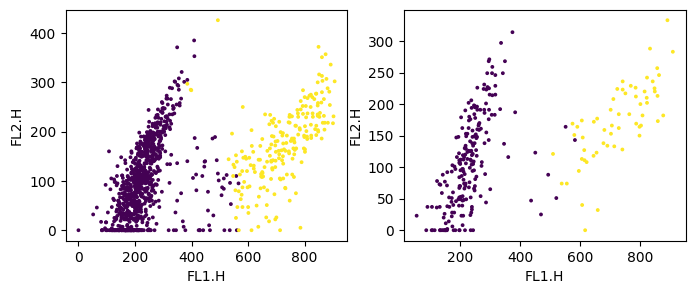

In [50]:
axis_x = 2
axis_y = 3

col_names=new_df.iloc[:,:-1].columns.tolist()
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.scatter(X_train[:,axis_x],X_train[:,axis_y],c=y_kmeans,cmap='viridis',s=3)
plt.xlabel(col_names[axis_x])
plt.ylabel(col_names[axis_y])

plt.subplot(1,2,2)
plt.scatter(X_test[:,axis_x],X_test[:,axis_y],c=predict_labels,cmap='viridis',s=3)
plt.xlabel(col_names[axis_x])
plt.ylabel(col_names[axis_y])

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       212
           1       0.97      0.92      0.94        63

    accuracy                           0.97       275
   macro avg       0.97      0.96      0.96       275
weighted avg       0.97      0.97      0.97       275



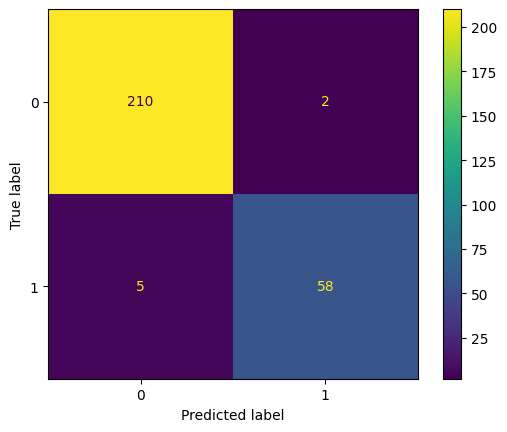

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
print(classification_report(y_test, predict_labels))
cm = confusion_matrix(y_test, predict_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [86]:
from sklearn.cluster import AgglomerativeClustering

ml=AgglomerativeClustering(n_clusters=2,linkage='ward')
ml.fit(X_train)
y_agg = ml.labels_
print(adjusted_rand_score(y_train,y_agg))

0.9067374473140364


Text(0, 0.5, 'FL2.H')

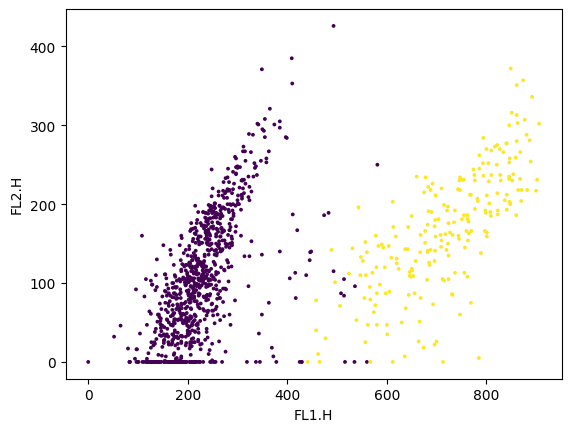

In [85]:
plt.scatter(X_train[:,axis_x],X_train[:,axis_y],c=y_agg,cmap='viridis',s=3)
plt.xlabel(col_names[axis_x])
plt.ylabel(col_names[axis_y])

In [80]:
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score(y_train,y_agg))
rw=adjusted_rand_score(y_test,y_pred)
print(rw)
print(classification_report(y_test, y_pred))

0.9067374473140364
0.8187375600957211
              precision    recall  f1-score   support

           0       0.12      0.04      0.06       212
           1       0.02      0.06      0.03        63

    accuracy                           0.04       275
   macro avg       0.07      0.05      0.04       275
weighted avg       0.10      0.04      0.05       275



Text(0.5, 1.0, 'Hierarchical Clustering')

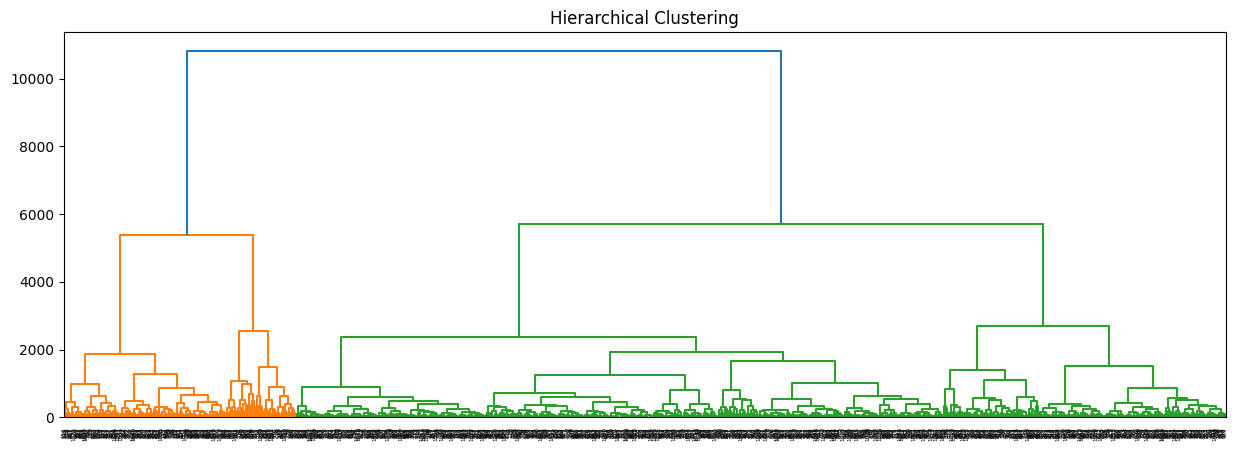

In [90]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dis=sch.linkage(X_train,metric='euclidean',method='ward')
sch.dendrogram(dis)
plt.xticks(rotation=90,fontsize=4)
plt.title('Hierarchical Clustering')

In [62]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_knn = knn.predict(X_train)
  y_pred = knn.predict(X_test)
  print('k = ',i)
  print(classification_report(y_test, y_pred))
  #report = classification_report(y_test, y_pred,output_dict=True)
  #print(report['accuracy'])

'''
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.scatter(X_train[:,axis_x],X_train[:,axis_y],c=y_knn ,cmap='viridis',s=3)
plt.xlabel(col_names[axis_x])
plt.ylabel(col_names[axis_y])

plt.subplot(1,2,2)
plt.scatter(X_test[:,axis_x],X_test[:,axis_y],c=y_pred,cmap='viridis',s=3)
plt.xlabel(col_names[axis_x])
plt.ylabel(col_names[axis_y])
'''

k =  1
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       212
           1       0.94      0.98      0.96        63

    accuracy                           0.98       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.98      0.98       275

k =  2
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       212
           1       0.97      0.97      0.97        63

    accuracy                           0.99       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.99      0.99      0.99       275

k =  3
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       212
           1       0.97      0.98      0.98        63

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.98       275
weighted avg       0.99      0.99      0.99       275

"\nplt.figure(figsize=(8,3))\nplt.subplot(1,2,1)\nplt.scatter(X_train[:,axis_x],X_train[:,axis_y],c=y_knn ,cmap='viridis',s=3)\nplt.xlabel(col_names[axis_x])\nplt.ylabel(col_names[axis_y])\n\nplt.subplot(1,2,2)\nplt.scatter(X_test[:,axis_x],X_test[:,axis_y],c=y_pred,cmap='viridis',s=3)\nplt.xlabel(col_names[axis_x])\nplt.ylabel(col_names[axis_y])\n"

* dataloader
* include model
* training

In [92]:
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split

In [94]:
all_labels.shape

(1374,)

In [95]:
tensor_data = torch.tensor(all_featues)
tensor_label = torch.tensor(all_labels)
trainset = torch.utils.data.TensorDataset(tensor_data,tensor_label)
num_train = int(0.8 * len(trainset))
num_val = len(trainset) - num_train
train_set, val_set = torch.utils.data.random_split(trainset, [num_train, num_val])

In [96]:
batch_size = 32
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

In [118]:
#model define
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 12)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(12, 2)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.act2(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)

        return x

In [121]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

model.train()
for epoch in range(1, 100):
  with tqdm(trainloader, unit="batch") as tepoch:
    for data, target in tepoch:
      tepoch.set_description(f"Epoch {epoch}")
      target = target.reshape(-1, 1).float()

      #data, target = data.to(device), target.to(device)

      output = model(data.float())
      loss = loss_fn(output, target)
      acc = (output.round() == target).float().mean()

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      tepoch.set_postfix(loss=loss.item(), accuracy=100. * acc)

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

  0%|          | 0/43 [00:00<?, ?batch/s]

In [116]:
target.flatten()

tensor([0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.])

In [113]:
target

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.]])